In [4]:
#Remove dates from pricefiles (oold to new)

import os
import pandas as pd

# Set the folder path and the target date
folder_path = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/Company_price_files/Training_small'
target_date = '2018-01-22'  # Change this to your desired date

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # Read CSV assuming first column contains the date
            df = pd.read_csv(file_path)

            # Find index of first row where the date starts with the target_date
            index_to_keep_from = df[df.iloc[:, 0].astype(str).str.startswith(target_date)].index

            if not index_to_keep_from.empty:
                trimmed_df = df.loc[index_to_keep_from[0]:].reset_index(drop=True)
                trimmed_df.to_csv(file_path, index=False)
                print(f"Trimmed {filename} starting from {target_date}")
            else:
                print(f"No matching date found in {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

Trimmed FLOW.AS.csv starting from 2018-01-22
Trimmed WKL.AS.csv starting from 2018-01-22
Trimmed AALBF.csv starting from 2018-01-22
No matching date found in ADYEN.AS.csv
Trimmed KPN.AS.csv starting from 2018-01-22
Trimmed AD.AS.csv starting from 2018-01-22
Trimmed AKZA.AS.csv starting from 2018-01-22
Trimmed INGA.AS.csv starting from 2018-01-22
Trimmed BESI.AS.csv starting from 2018-01-22
Trimmed TWEKA.AS.csv starting from 2018-01-22
Trimmed APAM.AS.csv starting from 2018-01-22
Trimmed AGN.AS.csv starting from 2018-01-22
Trimmed SHELL.AS.csv starting from 2018-01-22
Trimmed VPK.AS.csv starting from 2018-01-22
Trimmed REINA.AS.csv starting from 2018-01-22
Trimmed GLPG.AS.csv starting from 2018-01-22
Trimmed HAL.AS.csv starting from 2018-01-22
Trimmed CRBN.AS.csv starting from 2018-01-22
No matching date found in PRX.AS.csv
Trimmed ASML.AS.csv starting from 2018-01-22
Trimmed OCI.AS.csv starting from 2018-01-22
Trimmed SBMO.AS.csv starting from 2018-01-22
Trimmed ARCAD.AS.csv starting f

In [127]:
#Concoctanate csv files from folder

import os
import pandas as pd

folder_path = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set/1'  # Update this with the path to your folder containing CSV files
output_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/testset3.csv'  # File where the concatenated data will be saved

# Get a list of all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read the first file to get its header
first_file = pd.read_csv(os.path.join(folder_path, file_list[0]))

# Write the header of the first file to the output file
first_file.to_csv(output_file, index=False)

# Iterate through the remaining files and append their content (skipping the header)
for file in file_list[1:]:
    data = pd.read_csv(os.path.join(folder_path, file))
    data.to_csv(output_file, mode='a', header=False, index=False)

In [124]:
#Remove columns and rows from csv file

import csv

def remove_columns_and_rows(input_file, output_file, columns_to_remove, rows_to_remove):
    with open(input_file, mode='r', newline='') as infile, open(output_file, mode='w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row_index, row in enumerate(reader):
            # Skip the rows that are in the rows_to_remove set
            if row_index in rows_to_remove:
                continue
            
            # Remove the specified columns (0-based index)
            modified_row = [value for idx, value in enumerate(row) if idx not in columns_to_remove]
            writer.writerow(modified_row)

# Specify the columns to remove (0-based index)
columns_to_remove = {1, 2}  # Removes 2nd, 3rd, 4th, 6th, and 7th columns (1, 2, 3, 5, 6)(1, 2)
rows_to_remove = {0}  # Removes the first row (index 0)

# Input and output file paths
input_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set2.csv'
output_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set3.csv'

# Call the function to remove the columns and rows
remove_columns_and_rows(input_file, output_file, columns_to_remove, rows_to_remove)

print(f"Columns and rows removed. Modified CSV saved to {output_file}")

Columns and rows removed. Modified CSV saved to /Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set3.csv


In [72]:
#Reverse order (for test data)

import csv

# Input and output file paths
input_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set/1/WKL2.csv'
output_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set/WKL.csv'

# Read all rows and reverse the order
with open(input_file, mode='r', newline='') as f:
    reader = list(csv.reader(f))
    rows = reader[::-1]  # Reverse all rows since there's no header

# Write the reversed rows to a new CSV
with open(output_file, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(rows)

In [74]:
#Remove repeating rows from csv file

import pandas as pd

# Read the CSV file into a DataFrame
file_path = "/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set2.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Identify and remove rows with repeating prices in column index 1
df_cleaned = df[df.iloc[:, 1] != df.iloc[:, 1].shift()]

# Remove rows containing "null" values
df_cleaned = df_cleaned.dropna()

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = "/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set3.csv"  # Update with your desired file path
df_cleaned.to_csv(cleaned_file_path, index=False)

# Print a summary
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (8628, 2)
Cleaned DataFrame shape: (8389, 2)


In [123]:
#Normalize the prices 

import pandas as pd
import numpy as np

def compute_log_returns(prices):
    """Compute log returns for a series of prices."""
    return np.log(prices / prices.shift(1))

def scale_to_minus_one_one(series, scale_factor=2.0):
    """
    Scale a series to [-1, 1] using standard deviation.
    scale_factor: Number of standard deviations to map to [-1, 1].
    """
    std = series.std()
    if std == 0:
        return series * 0  # Handle case with no variation
    scaled = series / (scale_factor * std)
    # Clip to ensure values stay within [-1, 1]
    return np.clip(scaled, -1, 1)

def normalize_stock_data(input_file, output_file, price_col=1):
    """
    Normalize stock prices in a single column to [-1, 1] using log returns, preserving input order.
    input_file: Path to CSV with columns Date and Price (unnamed at index 1)
    output_file: Path to save normalized CSV
    price_col: Index of the price column (default: 1 for column B)
    """
    # Read the data
    df = pd.read_csv(input_file)
    
    # Check if the CSV has exactly two columns
    if len(df.columns) != 2:
        raise ValueError("CSV must have exactly two columns: Date (index 0) and Price (index 1)")
    
    # Rename the price column (at index 1) to 'Price'
    df = df.rename(columns={df.columns[price_col]: 'Price'})
    
    # Ensure expected columns exist
    if not all(col in df.columns for col in ['Date', 'Price']):
        raise ValueError(f"Input CSV must contain 'Date' and a Price column (at index {price_col})")
    
    # Convert Date to datetime (for consistency, but no sorting)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute log returns for the entire price series, preserving order
    df['LogReturn'] = compute_log_returns(df['Price'])
    
    # Drop NaN values (first row will have NaN log return)
    df = df.dropna()
    
    # Scale log returns to [-1, 1]
    df['Normalized'] = scale_to_minus_one_one(df['LogReturn'])
    
    # Save the normalized data
    df.to_csv(output_file, index=False)
    
    return df
 

# Example usage
if __name__ == "__main__":
    input_file = "/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set/ASML.csv"
    output_file = "/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set/1/ASML.csv"
    normalized_df = normalize_stock_data(input_file, output_file, price_col=1)
    print(normalized_df.head())

        Date  Price  LogReturn  Normalized
1 2024-05-21  853.7  -0.012803   -0.231645
2 2024-05-22  854.1   0.000468    0.008476
3 2024-05-23  876.4   0.025774    0.466343
4 2024-05-24  880.5   0.004667    0.084447
5 2024-05-27  882.6   0.002382    0.043101


Count: 152229
Min: -1.0
Max: 1.0
Mean: 0.0024302910397017855
Median: 0.0073883004213232
Mode: [-1.0]
Standard Deviation: 0.14408999618786278
Variance: 0.020761927001418313
Skewness: -0.3171614015112289
Kurtosis: 6.845496121940255


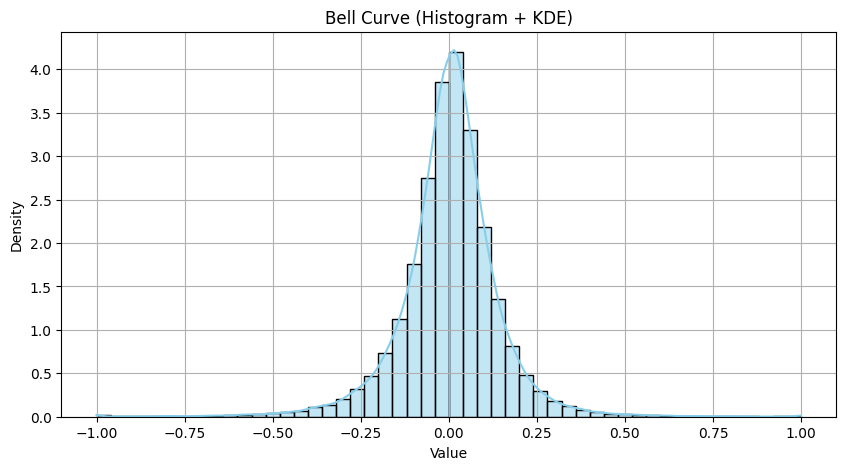

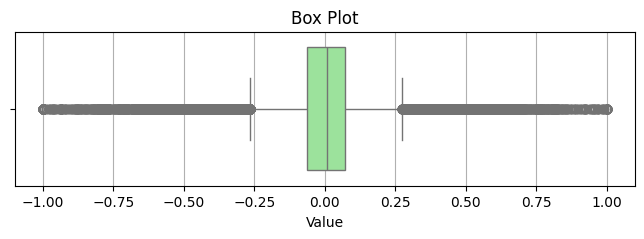

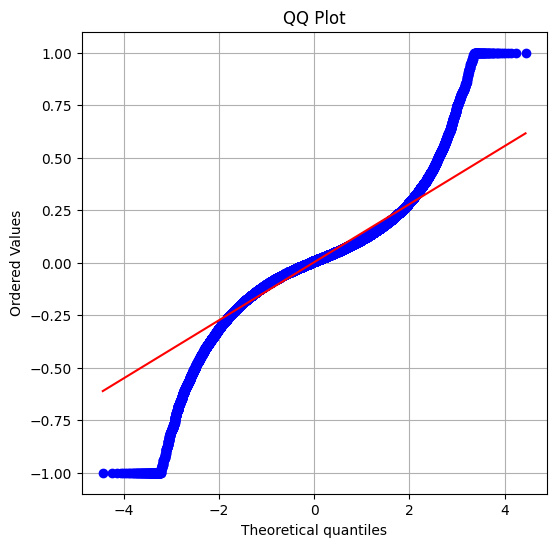

In [9]:
#Show distribution statistics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the CSV file
file_path = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/market_price_cleaned.csv'  # replace with your actual file path
df = pd.read_csv(file_path)

# Extract the column at index 1
column_data = df.iloc[:, 1].dropna()  # drop NaNs for accurate stats

# Compute descriptive statistics
stats_summary = {
    'Count': column_data.count(),
    'Min': column_data.min(),
    'Max': column_data.max(),
    'Mean': column_data.mean(),
    'Median': column_data.median(),
    'Mode': column_data.mode().tolist(),  # list in case of multiple modes
    'Standard Deviation': column_data.std(),
    'Variance': column_data.var(),
    'Skewness': column_data.skew(),
    'Kurtosis': column_data.kurt()
}

# Print the results
for stat, value in stats_summary.items():
    print(f"{stat}: {value}")

# --------------------------
# Visualization Functions
# --------------------------

def plot_bell_curve(data):
    """Bell curve (histogram with KDE overlay)"""
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=50, kde=True, color='skyblue', stat='density')
    plt.title('Bell Curve (Histogram + KDE)')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

def plot_box_plot(data):
    """Box plot for descriptive summary"""
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=data, color='lightgreen')
    plt.title('Box Plot')
    plt.xlabel('Value')
    plt.grid(True, axis='x')
    plt.show()

def plot_qq_plot(data):
    """QQ plot for normality check"""
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("QQ Plot")
    plt.grid(True)
    plt.show()

# --------------------------
# Call Visualization Functions
# --------------------------

plot_bell_curve(column_data)
plot_box_plot(column_data)
plot_qq_plot(column_data)

In [ ]:
#Create the labels (with prices)

import csv

input_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/files_market/market_price.csv'
output_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/gaf_labels_transfer_large.csv'

# Read stock prices from column index 1
with open(input_file, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

# Get just the prices (as float) from column 1
prices = [float(row[1]) for row in data]

# Prepare rows for the new CSV
output_rows = []
for i in range(len(prices) - 1):  # skip last row (no next day)
    label = 1 if prices[i + 1] > prices[i] else 0
    gaf_name = f'GAF{i+1}_{i+10}.png'
    output_rows.append([gaf_name, label])

# Write to new CSV
with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(output_rows)

print(f'Finished writing to {output_file}')

Finished writing to /Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/gaf_labels_transfer_large.csv


In [131]:
import csv

input_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/testset.csv'
output_file = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/gaf_labels_testset.csv'

# Read stock prices from column index 1
with open(input_file, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

# Get just the prices (as float) from column 1
prices = [float(row[1]) for row in data]

# Prepare rows for the new CSV
output_rows = []
for i in range(len(prices) - 1):  # skip last row (no next day)
    next_price = prices[i + 1]
    label = 1 if next_price > 0 else 0  # label as 1 if price went down (i.e., is negative)
    gaf_name = f'GAF{i+1}_{i+10}.png'
    output_rows.append([gaf_name, label])

# Write to new CSV
with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(output_rows)

print(f'Finished writing to {output_file}')


Finished writing to /Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/gaf_labels_testset.csv


In [ ]:
#Remove comma seperators from 1000

import pandas as pd

# Read the CSV (header is present)
df = pd.read_csv('/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set/ADYEN2.csv')

# Clean the 'Price' column: remove commas, convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Optional: save to cleaned CSV
df.to_csv('/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/test_set/ADYEN.csv', index=False)

In [2]:
import pandas as pd

# Load the CSV file
file_path = '/Users/ninadeplanque/Documents/Jacob/Data_Science/Thesis/test/gaf_labels_train_large.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Check if index 1 exists
if df.shape[1] <= 1:
    print("The CSV file doesn't have a second column (index 1).")
else:
    # Count 0's and 1's in the second column
    counts = df.iloc[:, 1].value_counts()

    num_zeros = counts.get(0, 0)
    num_ones = counts.get(1, 0)

    print(f"Number of 0's: {num_zeros}")
    print(f"Number of 1's: {num_ones}")

Number of 0's: 71761
Number of 1's: 74864
